In [1]:
#!pip install tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
training_data = pd.read_csv("/content/GOOG_train.csv")
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-28,910.659973,916.849976,905.770020,905.960022,905.960022,3276300
1,2017-05-01,901.940002,915.679993,901.450012,912.570007,912.570007,2116000
2,2017-05-02,909.619995,920.770020,909.453003,916.440002,916.440002,1587200
3,2017-05-03,914.859985,928.099976,912.543030,927.039978,927.039978,1499500
4,2017-05-04,926.070007,935.929993,924.590027,931.659973,931.659973,1422100


In [5]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2022-04-21,2587.000000,2606.149902,2493.000000,2498.750000,2498.750000,1507900
1255,2022-04-22,2500.000000,2509.040039,2382.810059,2392.280029,2392.280029,2320500
1256,2022-04-25,2388.590088,2465.560059,2375.385010,2465.000000,2465.000000,1726100
1257,2022-04-26,2455.000000,2455.000000,2383.237061,2390.120117,2390.120117,2469700
1258,2022-04-27,2287.459961,2350.000000,2262.485107,2300.409912,2300.409912,3111900


In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [7]:
training_set = training_data.iloc[:,1:2].values

In [8]:
training_set.shape, training_data.shape

((1259, 1), (1259, 7))

In [9]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
training_set_scaled

array([[4.16760538e-03],
       [8.42852523e-05],
       [3.68061258e-03],
       ...,
       [6.96241212e-01],
       [7.27339129e-01],
       [6.48884784e-01]])

In [11]:
# Creating a data structure with 60 timestamps and 1 output
x_train = []
y_train = []

for i in range(60,1259):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

# converting x_train and y_train into numpy array
x_train,y_train = np.array(x_train),np.array(y_train)

In [12]:
x_train

array([[4.16760538e-03, 8.42852523e-05, 3.68061258e-03, ...,
        3.42962523e-02, 2.83257815e-02, 3.29944419e-02],
       [8.42852523e-05, 3.68061258e-03, 6.13435429e-03, ...,
        2.83257815e-02, 3.29944419e-02, 2.43735631e-02],
       [3.68061258e-03, 6.13435429e-03, 1.13836961e-02, ...,
        3.29944419e-02, 2.43735631e-02, 2.47809576e-02],
       ...,
       [8.07984956e-01, 7.95238600e-01, 8.34554717e-01, ...,
        8.07263798e-01, 7.89151061e-01, 7.48411378e-01],
       [7.95238600e-01, 8.34554717e-01, 8.68616833e-01, ...,
        7.89151061e-01, 7.48411378e-01, 6.96241212e-01],
       [8.34554717e-01, 8.68616833e-01, 1.00000000e+00, ...,
        7.48411378e-01, 6.96241212e-01, 7.27339129e-01]])

In [13]:
y_train

array([0.02437356, 0.02478096, 0.02342299, ..., 0.69624121, 0.72733913,
       0.64888478])

In [14]:
x_train.shape

(1199, 60)

In [15]:
# reshaping the dataset
x_train = x_train.reshape(1199,60,1)

In [16]:
x_train.shape

(1199, 60, 1)

In [17]:
# BUILDING THE LSTM
# defining an object
model = tf.keras.models.Sequential()

In [18]:
# 1st LSTM layer
model.add(tf.keras.layers.LSTM(units=60,activation="relu",return_sequences=True,input_shape=(60,1)))
# adding dropout layer
model.add(tf.keras.layers.Dropout(0.2))
# 2nd LSTM layer
model.add(tf.keras.layers.LSTM(units=60,activation="relu",return_sequences=True))
# adding dropout layer
model.add(tf.keras.layers.Dropout(0.2))
# 3rd LSTM layer
model.add(tf.keras.layers.LSTM(units=80,activation="relu",return_sequences=True))
# adding dropout layer
model.add(tf.keras.layers.Dropout(0.2))
# 4th LSTM layer
model.add(tf.keras.layers.LSTM(units=120,activation="relu"))
# adding dropout layer
model.add(tf.keras.layers.Dropout(0.2))
# adding output layer
model.add(tf.keras.layers.Dense(units=1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [20]:
# compile the model
# optimizer = adam is better than rmsprop here although rmsprop is better for rnns
model.compile(optimizer="adam",loss="mean_squared_error")
# loss = mse because of a regression problem

In [21]:
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 [==============================] - 30s 603ms/step - loss: 0.0443
Epoch 2/100
38/38 [==============================] - 20s 524ms/step - loss: 0.0050
Epoch 3/100
38/38 [==============================] - 22s 571ms/step - loss: 0.0037
Epoch 4/100
38/38 [==============================] - 21s 541ms/step - loss: 0.0039
Epoch 5/100
38/38 [==============================] - 20s 523ms/step - loss: 0.0038
Epoch 6/100
38/38 [==============================] - 20s 525ms/step - loss: 0.0036
Epoch 7/100
38/38 [==============================] - 20s 534ms/step - loss: 0.0042
Epoch 8/100
38/38 [==============================] - 20s 531ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 20s 538ms/step - loss: 0.0030
Epoch 10/100
38/38 [==============================] - 20s 528ms/step - loss: 0.0031
Epoch 11/100
38/38 [==============================] - 20s 532ms/step - loss: 0.0028
Epoch 12/100
38/38 [==============================] - 21s 543ms/step - loss: 0.0029
E

In [22]:
# getting the real stock prices of the month April to May
test_data = pd.read_csv("/content/GOOG_test.csv")

In [23]:
test_data.shape

(21, 7)

In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       21 non-null     object 
 1   Open       21 non-null     float64
 2   High       21 non-null     float64
 3   Low        21 non-null     float64
 4   Close      21 non-null     float64
 5   Adj Close  21 non-null     float64
 6   Volume     21 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ KB


In [25]:
real_stock_price = test_data.iloc[:,1:2].values

In [26]:
real_stock_price

array([[2351.560059],
       [2278.129883],
       [2335.300049],
       [2360.070068],
       [2404.409912],
       [2310.379883],
       [2266.070068],
       [2320.810059],
       [2274.209961],
       [2238.76001 ],
       [2296.909912],
       [2307.679932],
       [2344.550049],
       [2304.75    ],
       [2236.820068],
       [2241.709961],
       [2202.080078],
       [2127.550049],
       [2102.840088],
       [2121.01001 ],
       [2195.77002 ]])

In [27]:
real_stock_price.shape

(21, 1)

In [28]:
# Getting predicted stock prices
# concatenation
dataset_total = pd.concat((training_data['Open'],test_data['Open']),axis=0)
# stock prices of previous 60 days for each day
inputs = dataset_total[len(dataset_total)-len(test_data)-60:].values
# reshape (convert into numpy array)
inputs = inputs.reshape(-1,1)
# feature scaling 
inputs = sc.transform(inputs)
# creating a test set

x_test=[]
for i in range(60,81):
  x_test.append(inputs[i-60:i,0])
# convert in numpy array
x_test = np.array(x_test)
# convert in 3D (required to process)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
# getting predicted stock prices
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [29]:
print(predicted_stock_price[1]),print(real_stock_price[1])

[2628.6553]
[2278.129883]


(None, None)

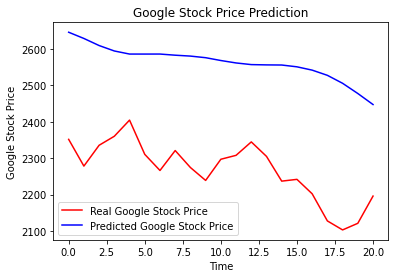

In [31]:
# Visualizing the results
plt.plot(real_stock_price,color="red",label="Real Google Stock Price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Google Stock Price")
plt.title('Google Stock Price Prediction')
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()